In [2]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(5*cols,5*rows))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot( y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter+=1
            if counter==(number_of_column-1,):
                break

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale, minmax_scale

%matplotlib inline

In [4]:
ds_breast = pd.read_csv("./유방암.csv", engine='python')
ds_breast.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
ds_breast.shape

(569, 31)

In [41]:
ds_breast.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


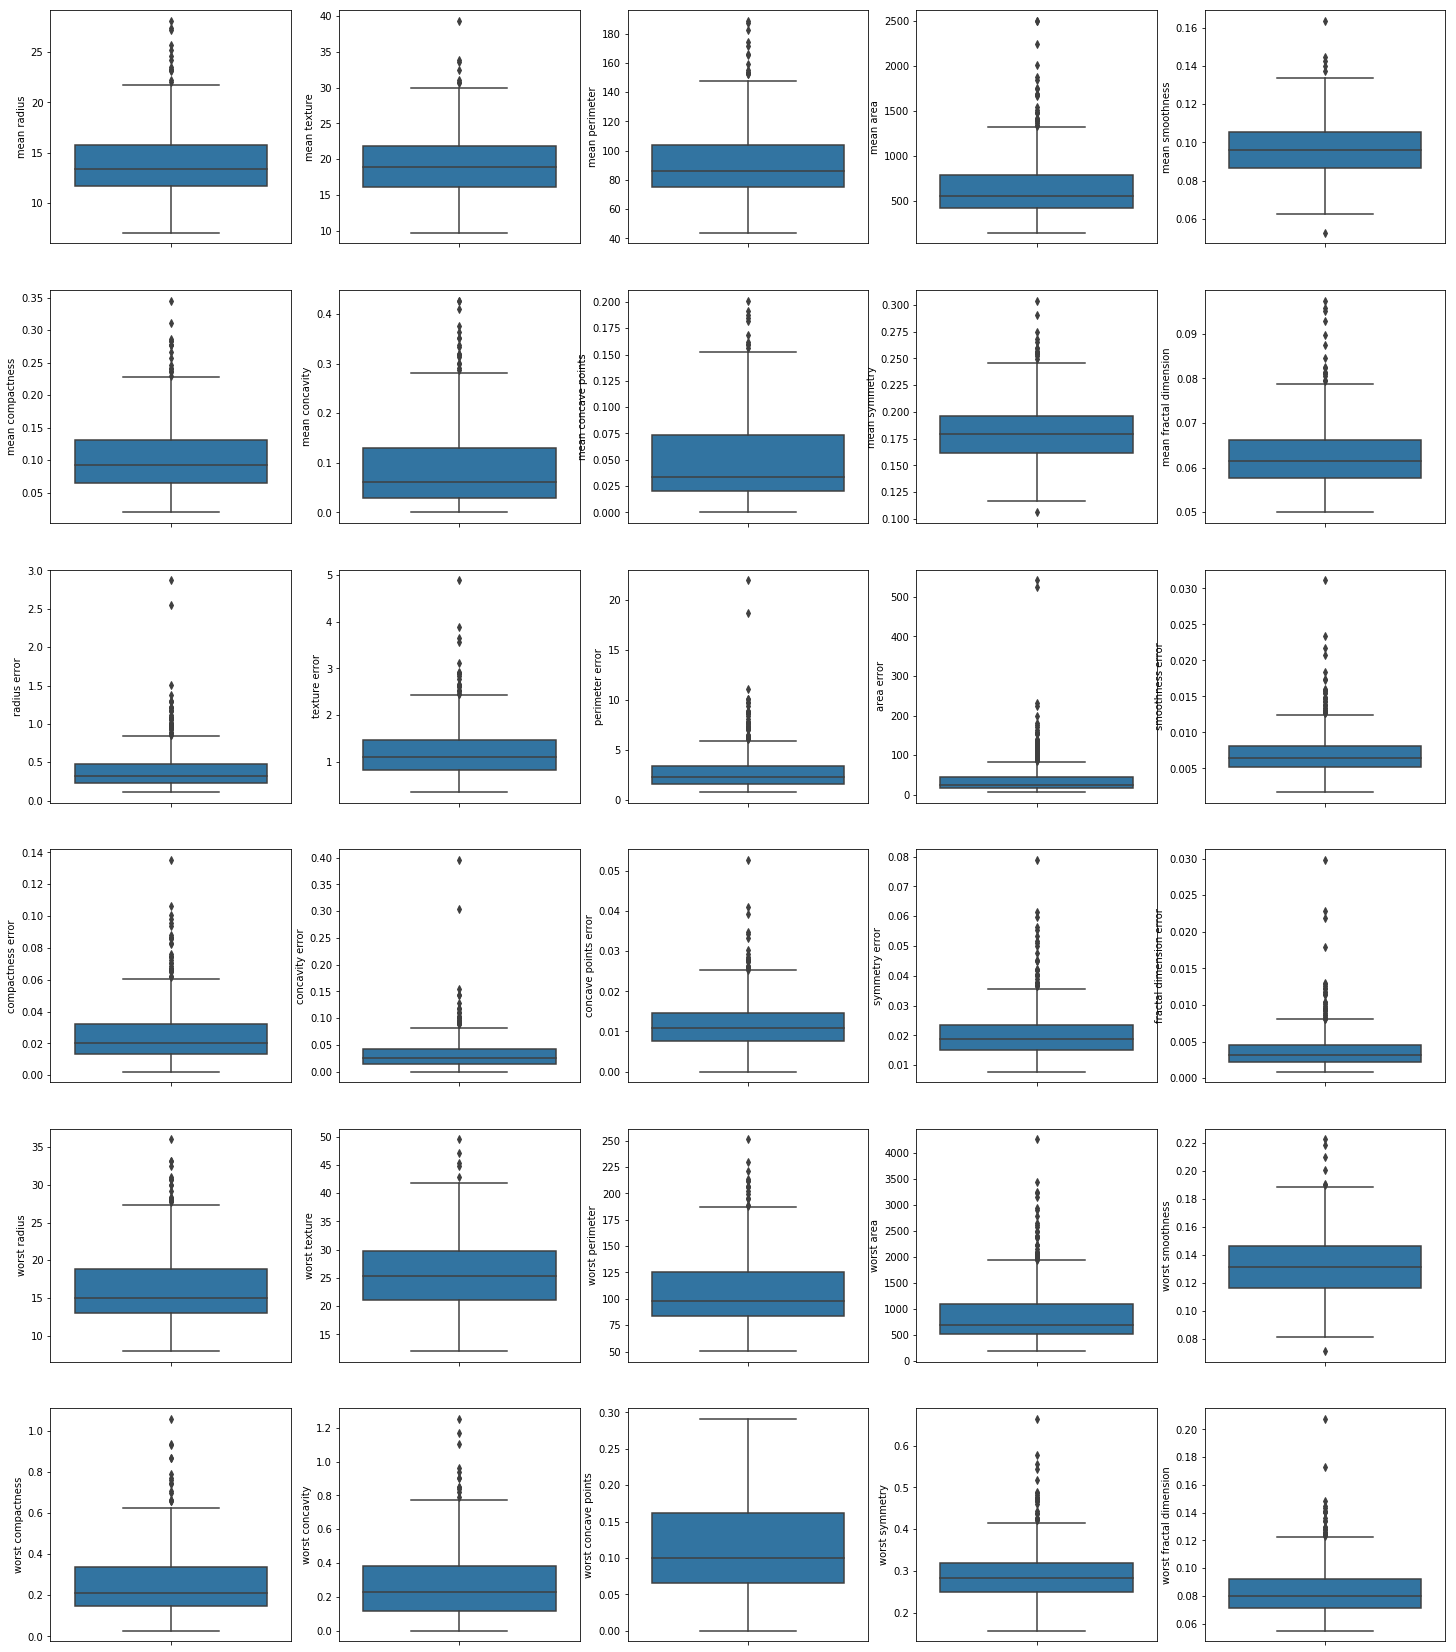

In [44]:
draw_multivarient_plot(ds_breast.drop("diagnosis",axis=1,inplace=False),6,5,"box") 

In [ ]:
for k, v in ds_breast.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(ds_breast)[0]
        print("%s 이상치 = %.2f%%" % (k, perc))

In [5]:
ds_breast[ds_breast["mean texture"] >35] 

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
239,0,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496


In [6]:
ds_breast.drop(["mean texture","diagnosis"],axis=1,inplace=False).describe()

,mean radius,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
ds_breast[ds_breast["mean texture"] >35] 

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
239,0,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496


In [8]:
ds_breast.drop(ds_breast[ds_breast["mean texture"]>35].index, inplace=True)
# df.drop(df[df.score < 50].index, inplace=True)

In [9]:
ds_breast[ds_breast["mean area"] >2000]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
180,0,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,0,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,0,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,0,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [10]:
ds_breast.drop(ds_breast[ds_breast["mean area"] >2000].index, inplace=True)

In [11]:
ds_breast[ds_breast["mean smoothness"] > 0.16]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
504,1,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.1252


In [12]:
ds_breast.drop(ds_breast[ds_breast["mean smoothness"] > 0.16].index, inplace=True)

In [13]:
ds_breast[ds_breast["mean compactness"] > 0.3]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
78,0,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
258,0,15.66,23.20,110.2,773.5,0.1109,0.3114,0.3176,0.1377,0.2495,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190


In [14]:
ds_breast.drop(ds_breast[ds_breast["mean compactness"] > 0.3].index, inplace=True)

In [15]:
ds_breast[ds_breast["radius error"] > 2]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [16]:
ds_breast.drop(ds_breast[ds_breast["radius error"] > 2].index, inplace=True)

In [17]:
ds_breast[ds_breast["concavity error"] > 0.25]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,1,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.1175
152,1,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


In [18]:
ds_breast.drop(ds_breast[ds_breast["concavity error"] > 0.25].index, inplace=True)

In [19]:
ds_breast[ds_breast["concave points error"] > 0.05]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [20]:
ds_breast.drop(ds_breast[ds_breast["concave points error"] > 0.05].index, inplace=True)

In [21]:
ds_breast[ds_breast["symmetry error"] > 0.07]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [22]:
ds_breast.drop(ds_breast[ds_breast["symmetry error"] > 0.07].index, inplace=True)

In [23]:
ds_breast[ds_breast["fractal dimension error"] > 0.025]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [24]:
ds_breast.drop(ds_breast[ds_breast["fractal dimension error"] > 0.025].index, inplace=True)

In [25]:
ds_breast[ds_breast["worst perimeter"] > 250]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [26]:
ds_breast.drop(ds_breast[ds_breast["worst perimeter"] > 250].index, inplace=True)

In [27]:
ds_breast[ds_breast["worst area"] > 4000]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [28]:
ds_breast.drop(ds_breast[ds_breast["worst area"] > 4000].index, inplace=True)

In [29]:
ds_breast[ds_breast["worst concavity"] > 1]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
9,0,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.105,0.2210,0.4366,0.2075
562,0,15.22,30.62,103.40,716.9,0.1048,0.2087,0.2550,0.09429,0.2128,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.170,0.2356,0.4089,0.1409


In [30]:
ds_breast.drop(ds_breast[ds_breast["worst concavity"] > 1].index, inplace=True)

In [31]:
ds_breast[ds_breast["worst symmetry"] > 0.6]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,0,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


In [32]:
ds_breast.drop(ds_breast[ds_breast["worst symmetry"] > 0.6].index, inplace=True)

In [33]:
ds_breast[ds_breast["worst fractal dimension"] > 0.16]

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [34]:
ds_breast.drop(ds_breast[ds_breast["worst fractal dimension"] > 0.16].index, inplace=True)

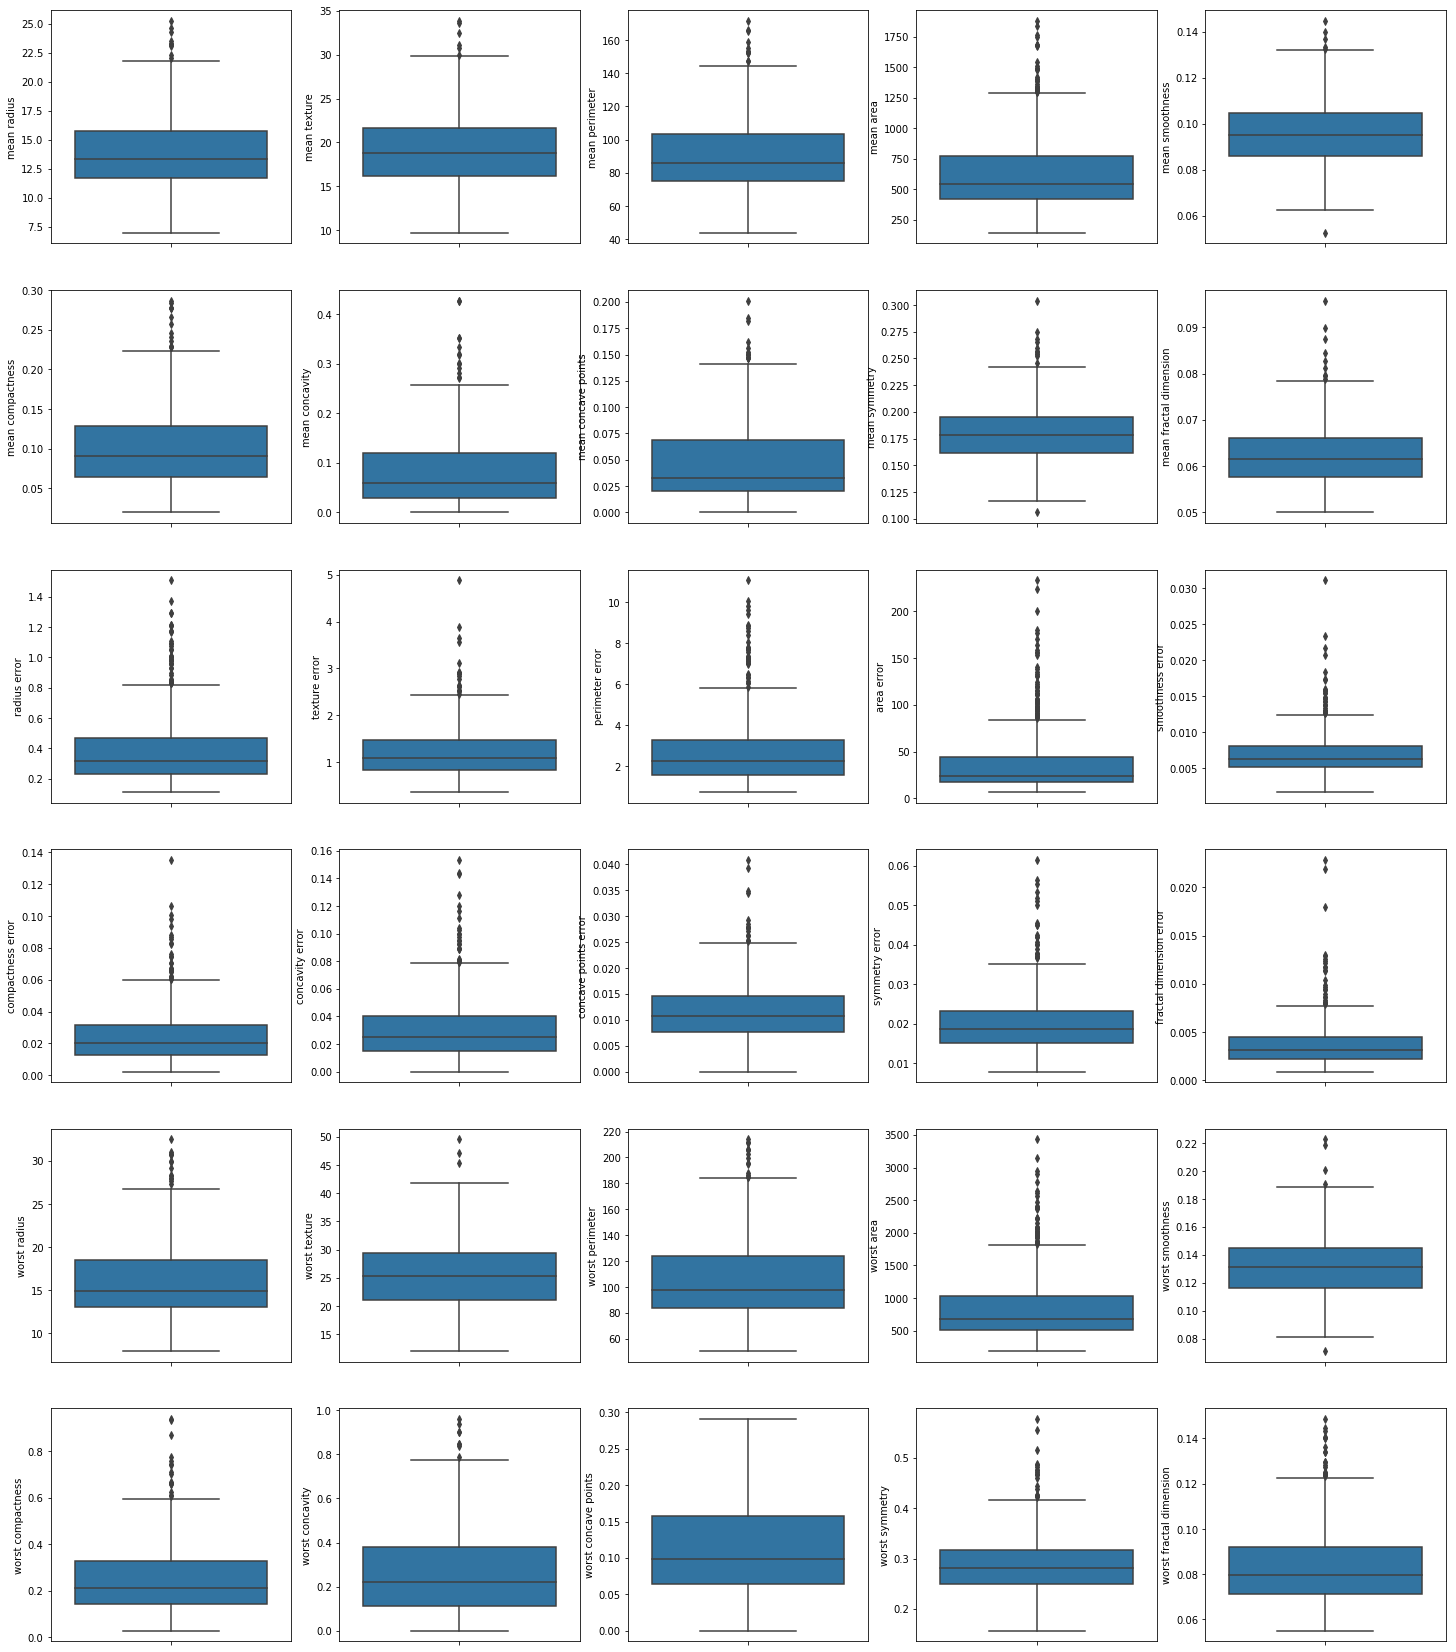

In [95]:
draw_multivarient_plot(ds_breast.drop("diagnosis",axis=1,inplace=False),6,5,"box") 

In [110]:
# ds_breast[(ds_breast["mean concavity"] > 0.4) | (ds_breast["mean symmetry"] > 0.29)].index

Int64Index([25, 108, 122], dtype='int64')

In [35]:
ds_breast.drop(ds_breast[(ds_breast["mean concavity"] > 0.4) | (ds_breast["mean symmetry"] > 0.29) |
               (ds_breast["mean fractal dimension"] > 0.92) | (ds_breast["smoothness error"] > 0.03) |
               (ds_breast["texture error"] > 4) | (ds_breast["compactness error"] > 0.12) |
               (ds_breast["fractal dimension error"] > 0.015)].index, inplace=True)

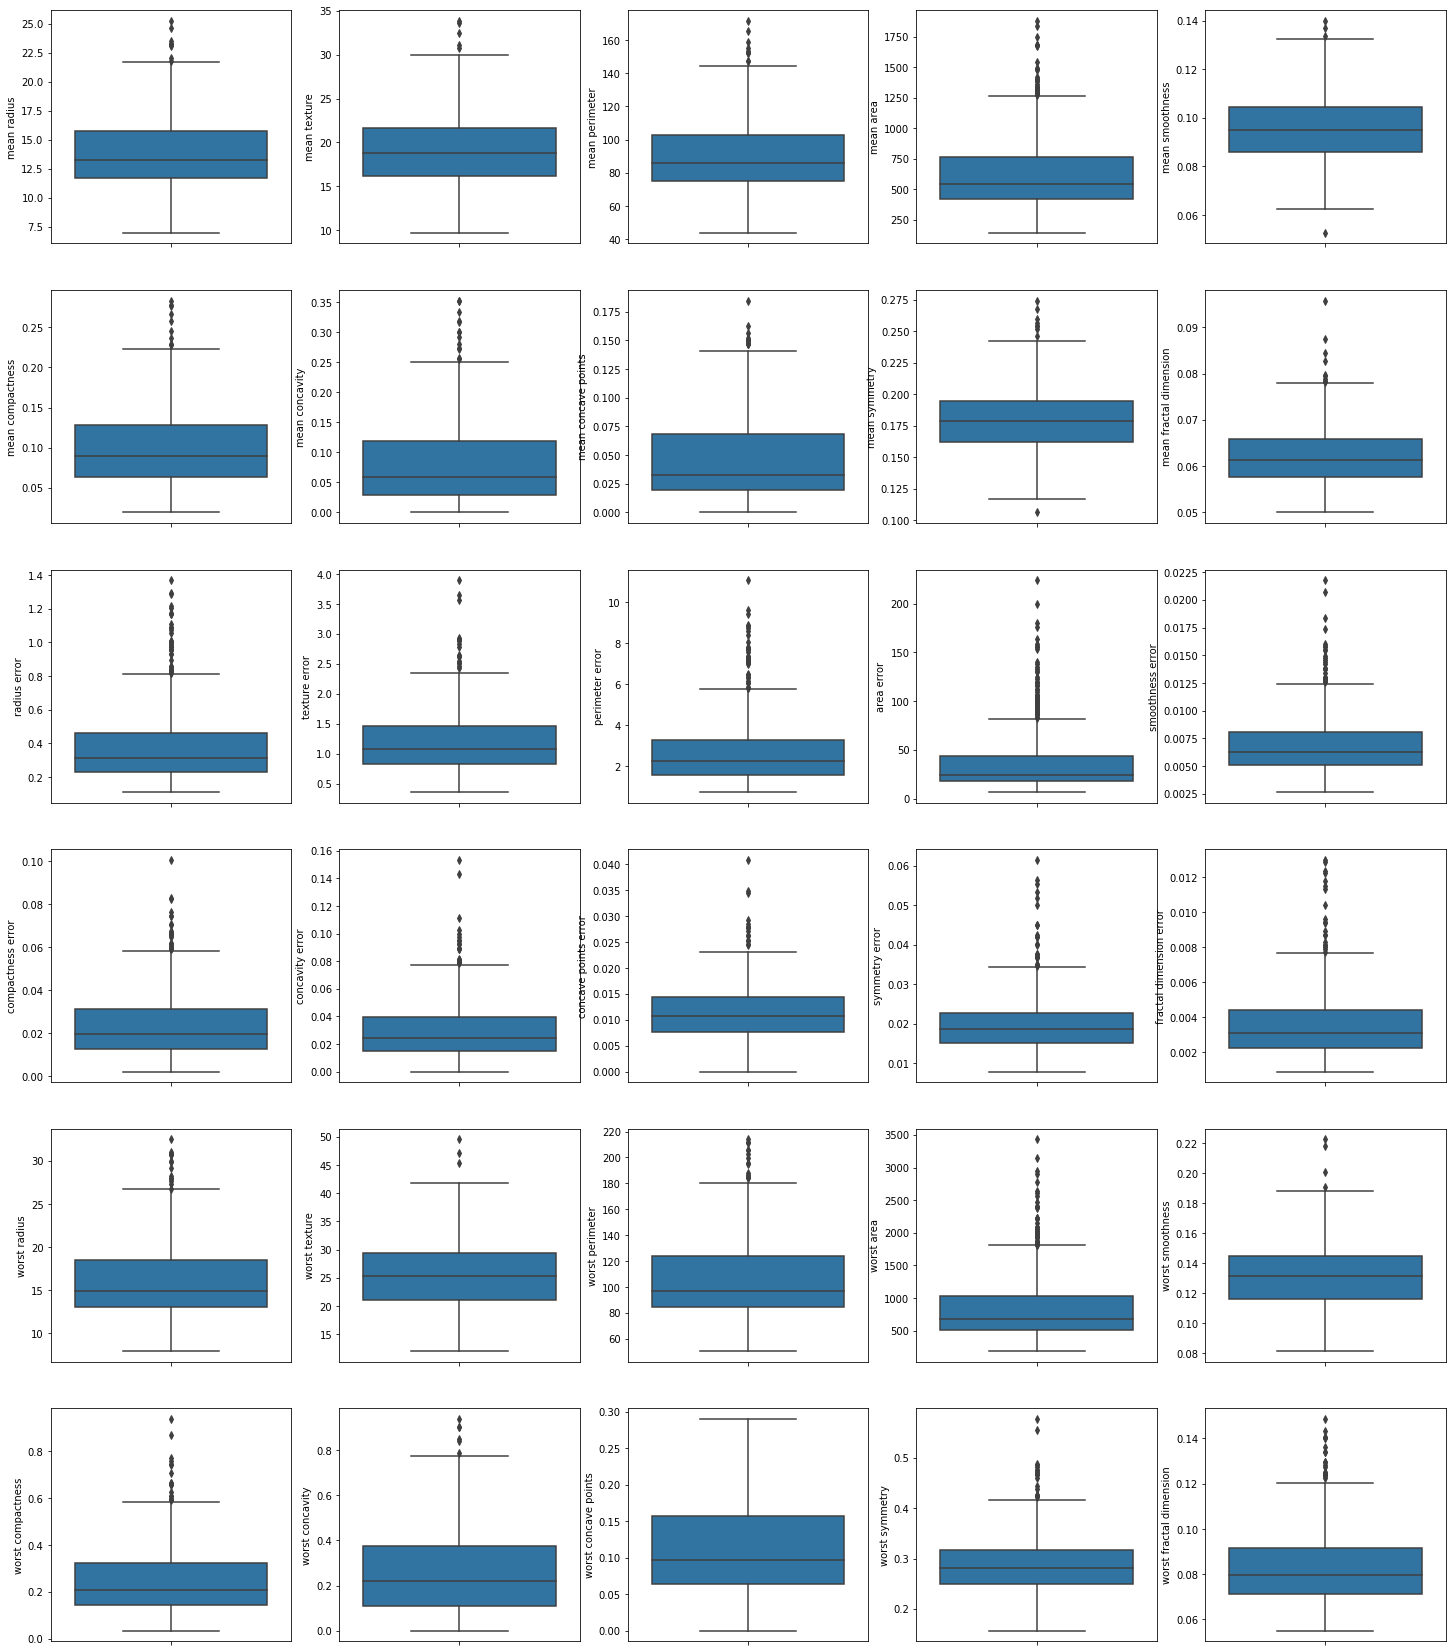

In [36]:
draw_multivarient_plot(ds_breast.drop("diagnosis",axis=1,inplace=False),6,5,"box") 

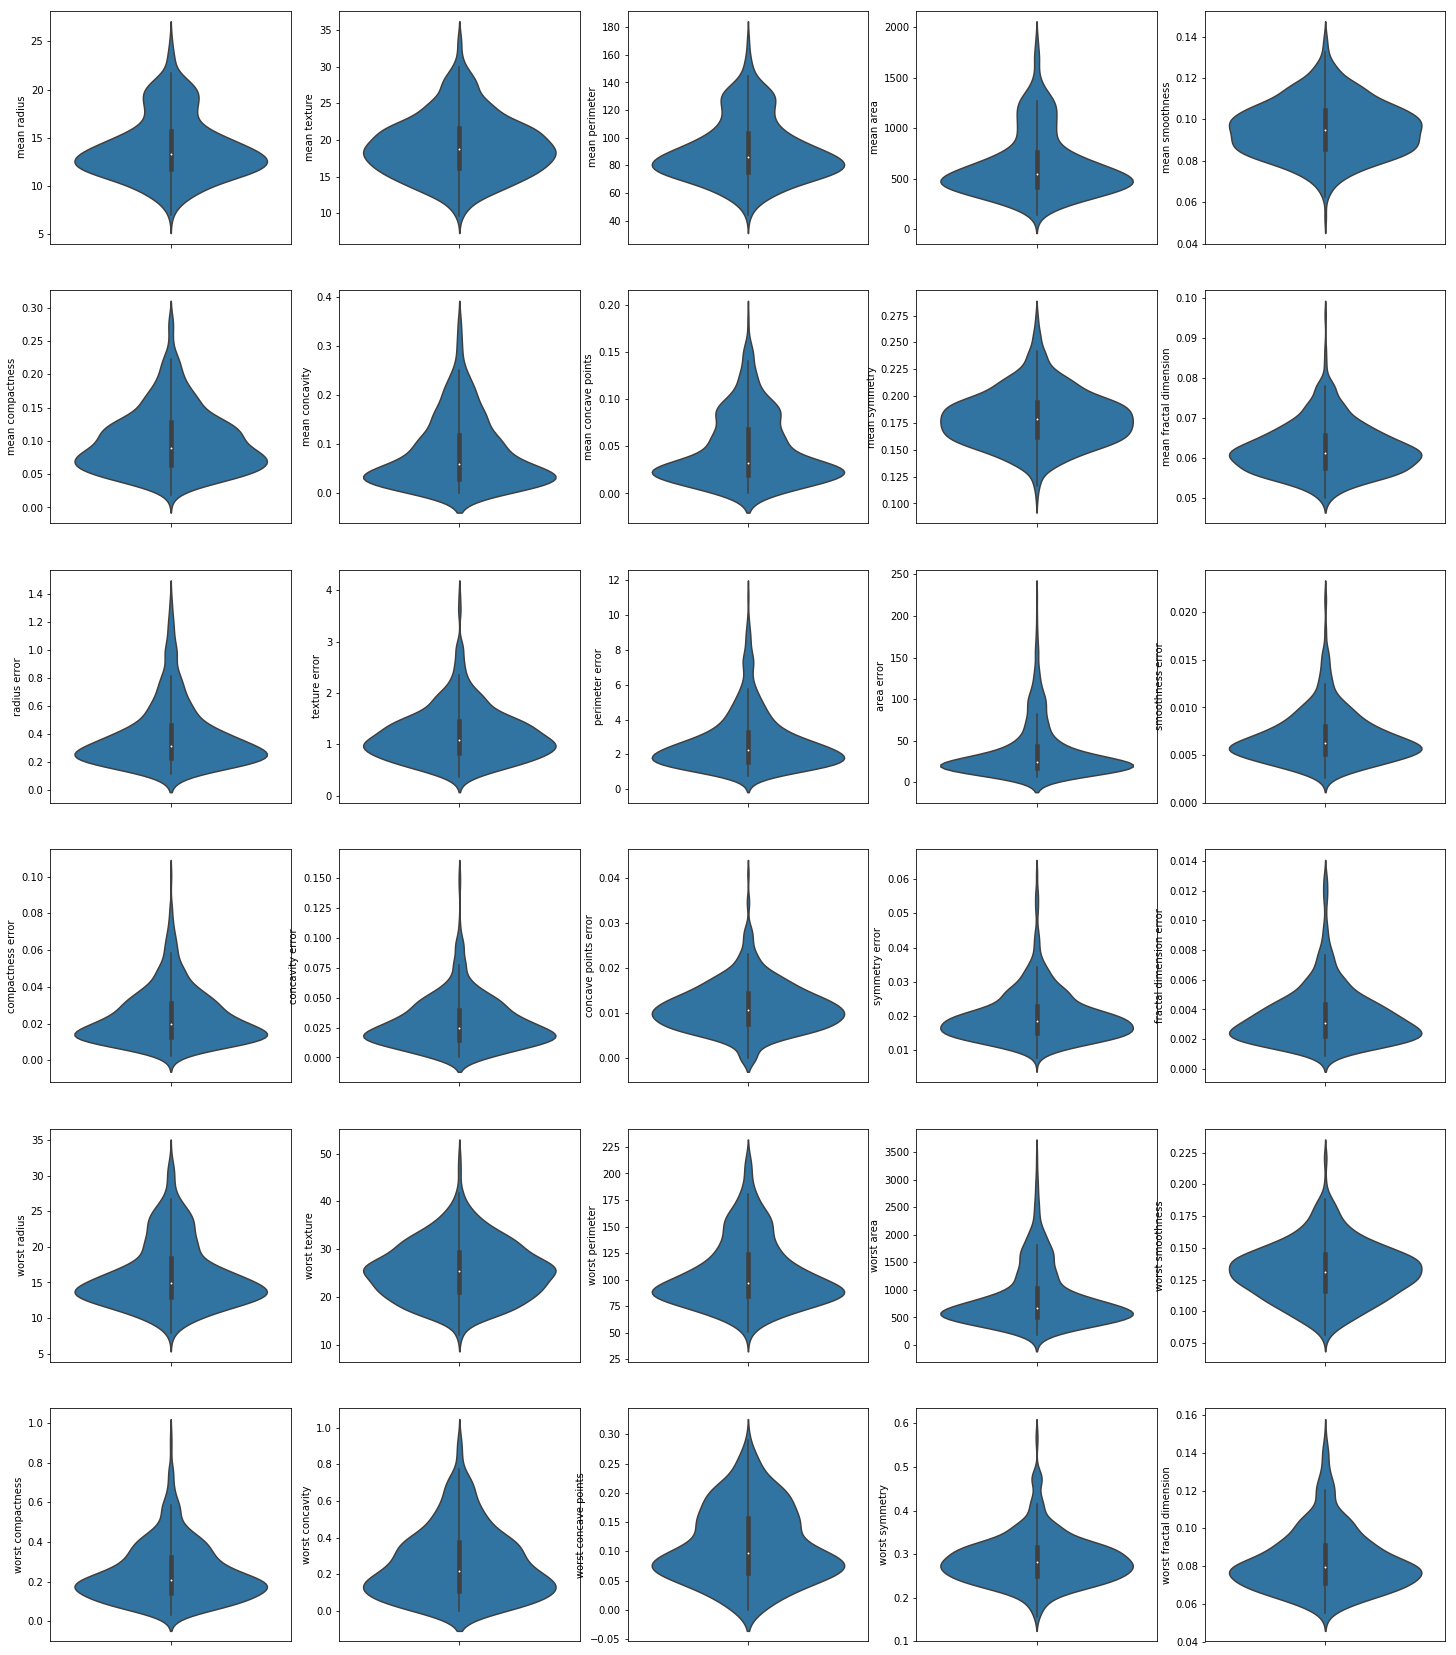

In [40]:
draw_multivarient_plot(ds_breast.drop("diagnosis",axis=1,inplace=False),6,5,"violin") 

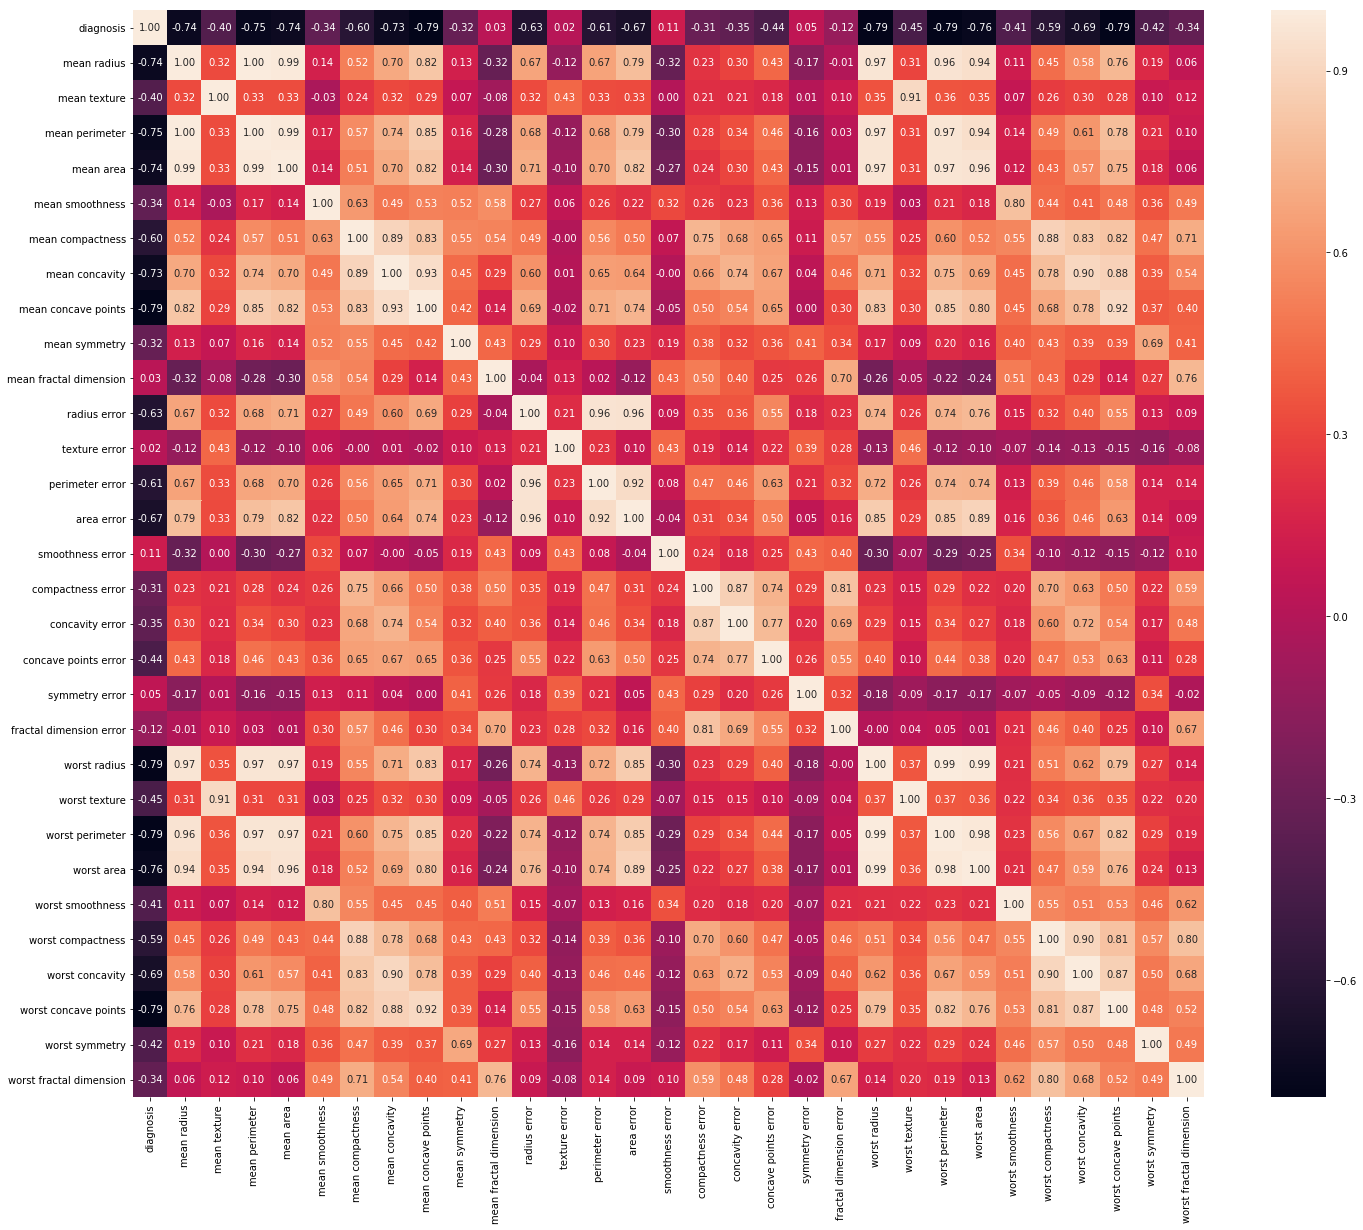

In [38]:
plt.figure(figsize=(24,20))
sns.heatmap(ds_breast.corr(),annot=True, fmt='.2f')

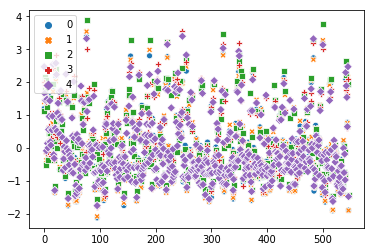

In [48]:
sns.scatterplot(data = scale(ds_breast[["mean radius","mean perimeter","mean area","worst radius","worst perimeter"]]))

In [39]:
ds_breast_y = ds_breast["diagnosis"]
ds_breast_const_x = sm.add_constant(ds_breast.drop(["diagnosis"],axis=1,inplace=False))

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

/home/donghyun-lee/miniconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,vif
9,mean symmetry,3.935
19,symmetry error,4.974
15,smoothness error,5.477
12,texture error,5.685
5,mean smoothness,8.830
29,worst symmetry,9.006
18,concave points error,12.460
20,fractal dimension error,12.608
25,worst smoothness,13.201
10,mean fractal dimension,13.567


In [52]:
ds_breast_const_x = ds_breast_const_x.drop(["mean perimeter","mean radius"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
8,mean symmetry,3.873
1,diagnosis,4.318
18,symmetry error,4.920
14,smoothness error,5.139
11,texture error,5.637
4,mean smoothness,8.552
27,worst symmetry,8.776
17,concave points error,11.680
19,fractal dimension error,12.429
23,worst smoothness,12.704


In [53]:
ds_breast_const_x = ds_breast_const_x.drop(["worst perimeter"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
8,mean symmetry,3.820
1,diagnosis,4.223
18,symmetry error,4.882
14,smoothness error,5.089
11,texture error,5.510
4,mean smoothness,8.496
26,worst symmetry,8.705
9,mean fractal dimension,11.538
17,concave points error,11.650
19,fractal dimension error,12.320


In [56]:
ds_breast_const_x = ds_breast_const_x.drop(["mean concavity"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
7,mean symmetry,3.807
1,diagnosis,4.206
17,symmetry error,4.856
13,smoothness error,5.066
10,texture error,5.509
4,mean smoothness,8.238
25,worst symmetry,8.647
16,concave points error,11.420
8,mean fractal dimension,11.531
18,fractal dimension error,12.308


In [57]:
ds_breast_const_x = ds_breast_const_x.drop(["worst area"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
7,mean symmetry,3.791
1,diagnosis,4.204
17,symmetry error,4.842
13,smoothness error,5.012
10,texture error,5.358
4,mean smoothness,8.227
24,worst symmetry,8.598
16,concave points error,11.176
8,mean fractal dimension,11.481
18,fractal dimension error,12.307


In [59]:
ds_breast_const_x = ds_breast_const_x.drop(["worst compactness"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
7,mean symmetry,3.740
1,diagnosis,4.201
17,symmetry error,4.808
13,smoothness error,4.996
10,texture error,5.357
4,mean smoothness,8.225
23,worst symmetry,8.419
18,fractal dimension error,10.472
8,mean fractal dimension,10.670
16,concave points error,11.165


In [60]:
ds_breast_const_x = ds_breast_const_x.drop(["radius error"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
7,mean symmetry,3.728
1,diagnosis,4.083
16,symmetry error,4.805
12,smoothness error,4.902
9,texture error,5.349
4,mean smoothness,8.090
22,worst symmetry,8.419
8,mean fractal dimension,10.363
17,fractal dimension error,10.463
15,concave points error,11.164


In [61]:
ds_breast_const_x = ds_breast_const_x.drop(["worst concave points"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
7,mean symmetry,3.671
1,diagnosis,4.083
16,symmetry error,4.782
12,smoothness error,4.811
9,texture error,5.098
15,concave points error,5.515
4,mean smoothness,7.926
21,worst symmetry,8.215
8,mean fractal dimension,10.350
17,fractal dimension error,10.435


In [62]:
ds_breast_const_x = ds_breast_const_x.drop(["worst texture"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
2,mean texture,1.939
9,texture error,2.305
7,mean symmetry,3.559
1,diagnosis,4.059
12,smoothness error,4.334
16,symmetry error,4.419
15,concave points error,5.475
4,mean smoothness,7.427
20,worst symmetry,7.485
17,fractal dimension error,10.221


In [63]:
ds_breast_const_x = ds_breast_const_x.drop(["worst concavity"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
2,mean texture,1.937
9,texture error,2.291
7,mean symmetry,3.558
1,diagnosis,4.021
12,smoothness error,4.293
16,symmetry error,4.414
15,concave points error,4.903
14,concavity error,5.400
4,mean smoothness,7.343
19,worst symmetry,7.485


In [64]:
ds_breast_const_x = ds_breast_const_x.drop(["mean compactness"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
2,mean texture,1.907
8,texture error,2.261
6,mean symmetry,3.503
1,diagnosis,3.994
11,smoothness error,4.170
15,symmetry error,4.412
14,concave points error,4.862
13,concavity error,5.387
4,mean smoothness,7.070
18,worst symmetry,7.471


In [65]:
ds_breast_const_x = ds_breast_const_x.drop(["area error"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
2,mean texture,1.907
8,texture error,2.248
6,mean symmetry,3.496
9,perimeter error,3.508
1,diagnosis,3.993
10,smoothness error,4.144
14,symmetry error,4.402
13,concave points error,4.716
12,concavity error,5.365
4,mean smoothness,7.070


In [66]:
ds_breast_const_x = ds_breast_const_x.drop(["mean concave points"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
2,mean texture,1.906
7,texture error,2.248
5,mean symmetry,3.477
8,perimeter error,3.504
1,diagnosis,3.772
9,smoothness error,4.138
12,concave points error,4.371
13,symmetry error,4.398
3,mean area,4.739
11,concavity error,5.320


In [67]:
ds_breast_const_x = ds_breast_const_x.drop(["worst fractal dimension"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_const_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_const_x.values,i) for i in range(ds_breast_const_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
2,mean texture,1.889
7,texture error,2.220
5,mean symmetry,3.378
8,perimeter error,3.497
1,diagnosis,3.574
9,smoothness error,3.823
13,symmetry error,3.882
12,concave points error,4.294
3,mean area,4.733
11,concavity error,5.234


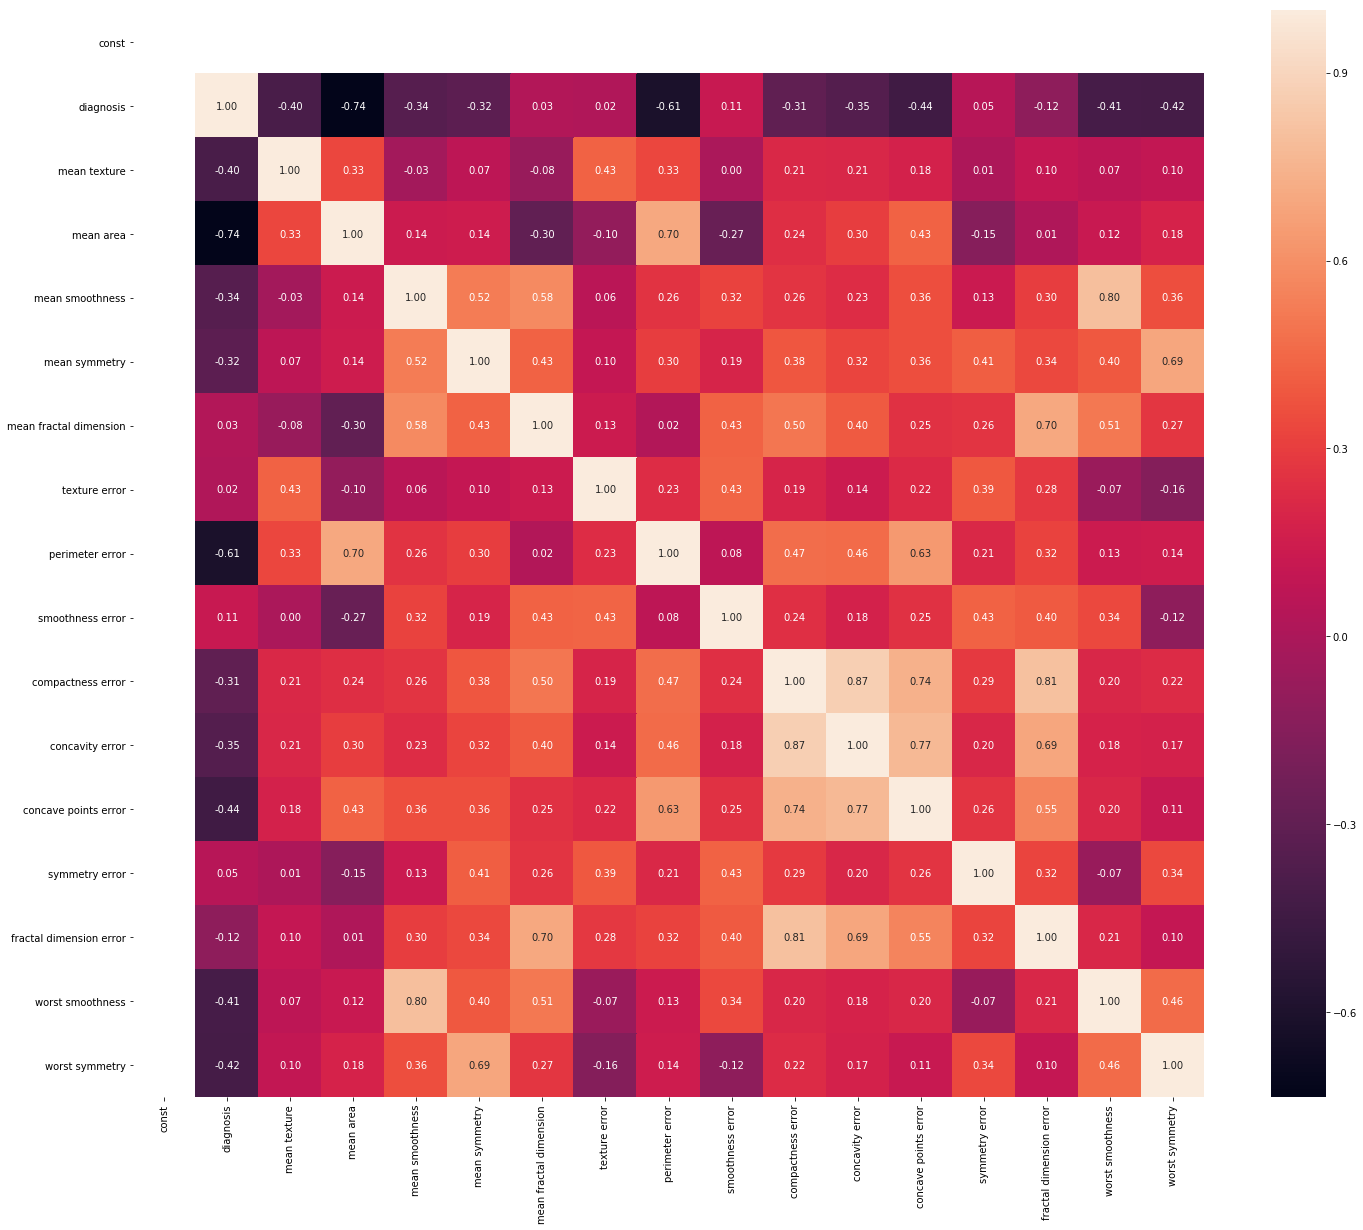

In [74]:
plt.figure(figsize=(24,20))
sns.heatmap(ds_breast_const_x.corr(),annot=True, fmt='.2f')

In [8]:
ds_breast_x = ds_breast.drop(["diagnosis","mean fractal dimension","texture error","smoothness error", "symmetry error", "fractal dimension error"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
12,compactness error,29.058
13,concavity error,30.407
14,concave points error,50.436
11,area error,63.035
21,worst concavity,79.153
23,worst symmetry,89.322
20,worst compactness,101.545
24,worst fractal dimension,107.626
22,worst concave points,140.492
7,mean concave points,148.872


In [115]:
ds_breast_x = ds_breast.drop(["diagnosis","mean fractal dimension","texture error", "symmetry error"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
12,smoothness error,32.349
16,fractal dimension error,44.663
15,concave points error,62.583
14,concavity error,64.998
13,compactness error,74.379
25,worst symmetry,98.301
23,worst concavity,118.309
7,mean concave points,145.076
6,mean concavity,147.136
22,worst compactness,153.707


In [116]:
ds_breast_y = ds_breast["diagnosis"]
ds_breast_x = ds_breast.drop(["diagnosis","mean fractal dimension","texture error","smoothness error", "symmetry error",
                              "fractal dimension error","worst perimeter","worst radius","mean perimeter","mean radius"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
10,compactness error,52.456
12,concave points error,55.063
11,concavity error,58.400
8,perimeter error,82.455
19,worst symmetry,94.175
9,area error,101.182
20,worst fractal dimension,107.249
1,mean area,112.769
3,mean compactness,113.853
17,worst concavity,116.754


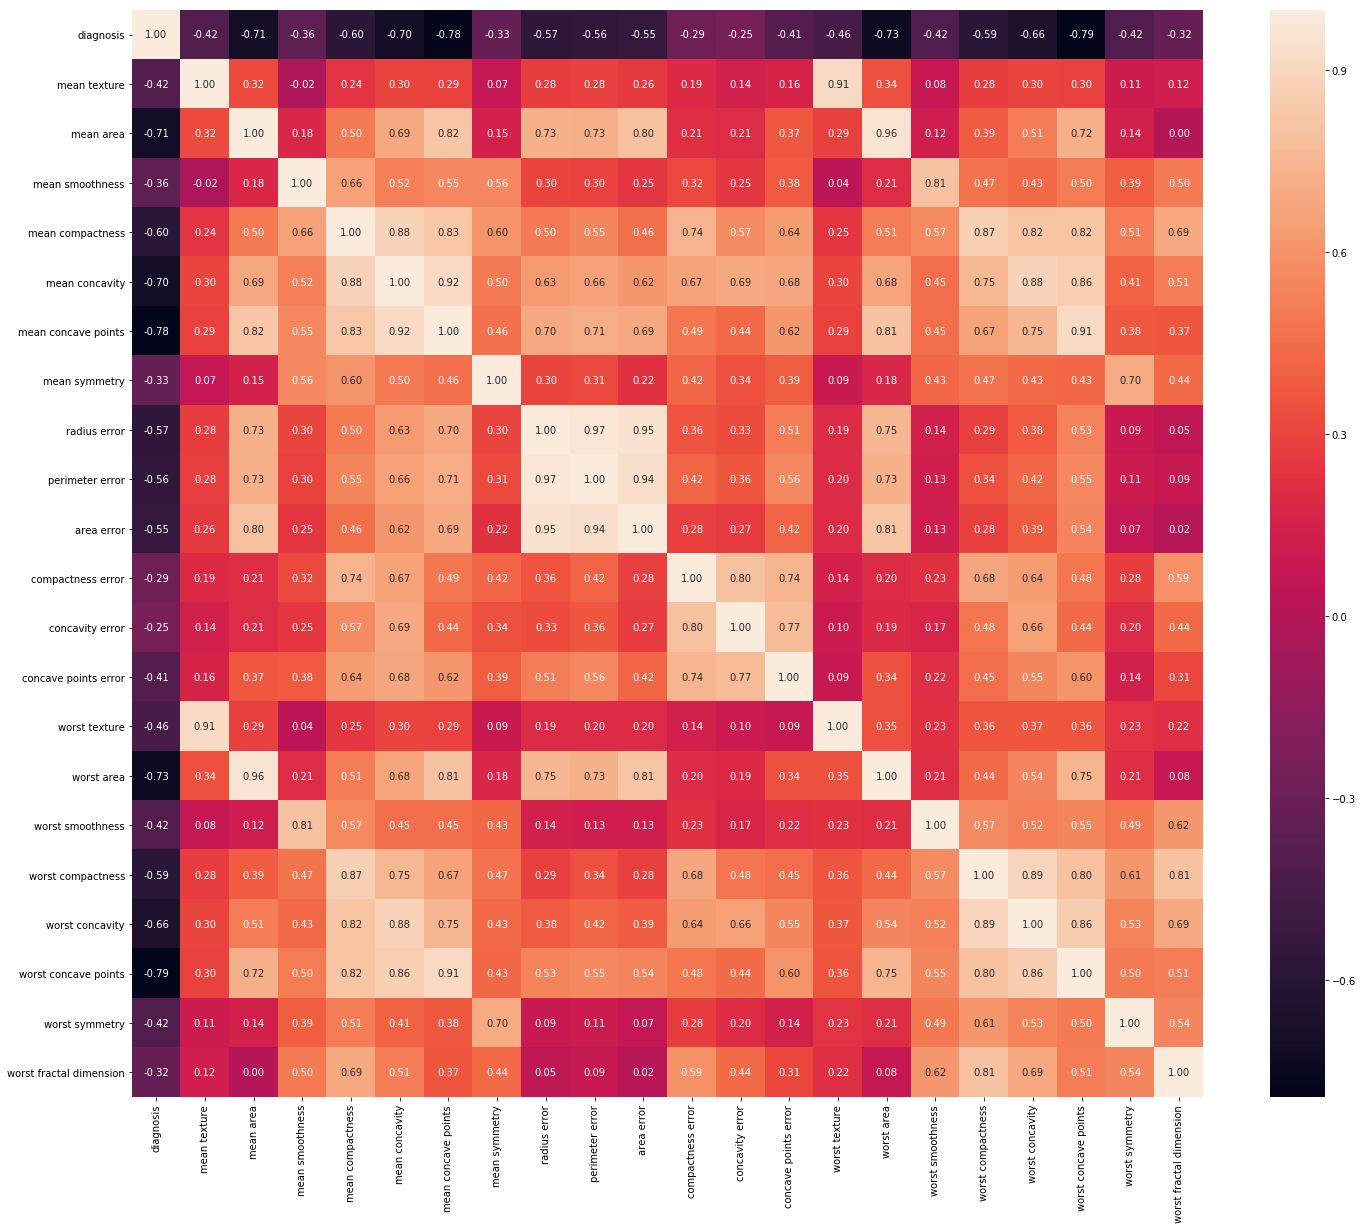

In [11]:
plt.figure(figsize=(24,20))
sns.heatmap(ds_breast.drop(["mean fractal dimension","texture error","smoothness error", "symmetry error",
                              "fractal dimension error","worst perimeter","worst radius","mean perimeter","mean radius"],axis=1,inplace=Falcse).corr(),annot=True, fmt='.2f')

In [12]:
ds_breast_y = ds_breast["diagnosis"]
ds_breast_x = ds_breast.drop(["mean fractal dimension","texture error","smoothness error", "symmetry error",
                              "fractal dimension error","worst perimeter","worst radius","diagnosis",
                "mean perimeter","mean radius","concavity error","worst fractal dimension"],axis=1,inplace=False)

df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
10,compactness error,23.217
11,concave points error,33.835
9,area error,34.020
16,worst concavity,72.715
13,worst area,73.504
15,worst compactness,79.591
8,perimeter error,81.257
1,mean area,81.800
18,worst symmetry,84.323
7,radius error,100.081


In [17]:
# ds_breast_x = ds_breast_x.drop("mean smoothness",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
9,compactness error,22.938
10,concave points error,32.588
8,area error,34.010
13,worst smoothness,55.587
12,worst area,70.741
15,worst concavity,71.645
1,mean area,77.582
14,worst compactness,78.295
7,perimeter error,81.061
17,worst symmetry,84.165


In [18]:
ds_breast_x = ds_breast_x.drop("mean texture",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
8,compactness error,22.934
10,worst texture,22.965
9,concave points error,32.065
7,area error,33.797
12,worst smoothness,54.954
11,worst area,69.081
0,mean area,70.852
14,worst concavity,71.613
13,worst compactness,78.292
6,perimeter error,80.887


In [19]:
ds_breast_x = ds_breast_x.drop("mean symmetry",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
9,worst texture,22.641
7,compactness error,22.926
8,concave points error,30.635
6,area error,33.612
15,worst symmetry,35.819
11,worst smoothness,48.070
0,mean area,67.796
10,worst area,67.968
13,worst concavity,71.594
12,worst compactness,76.333


In [20]:
ds_breast_x = ds_breast_x.drop("worst concave points",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
8,concave points error,19.214
7,compactness error,19.483
9,worst texture,22.640
6,area error,33.051
14,worst symmetry,35.333
11,worst smoothness,47.813
3,mean concave points,61.429
13,worst concavity,62.509
10,worst area,64.153
12,worst compactness,66.210


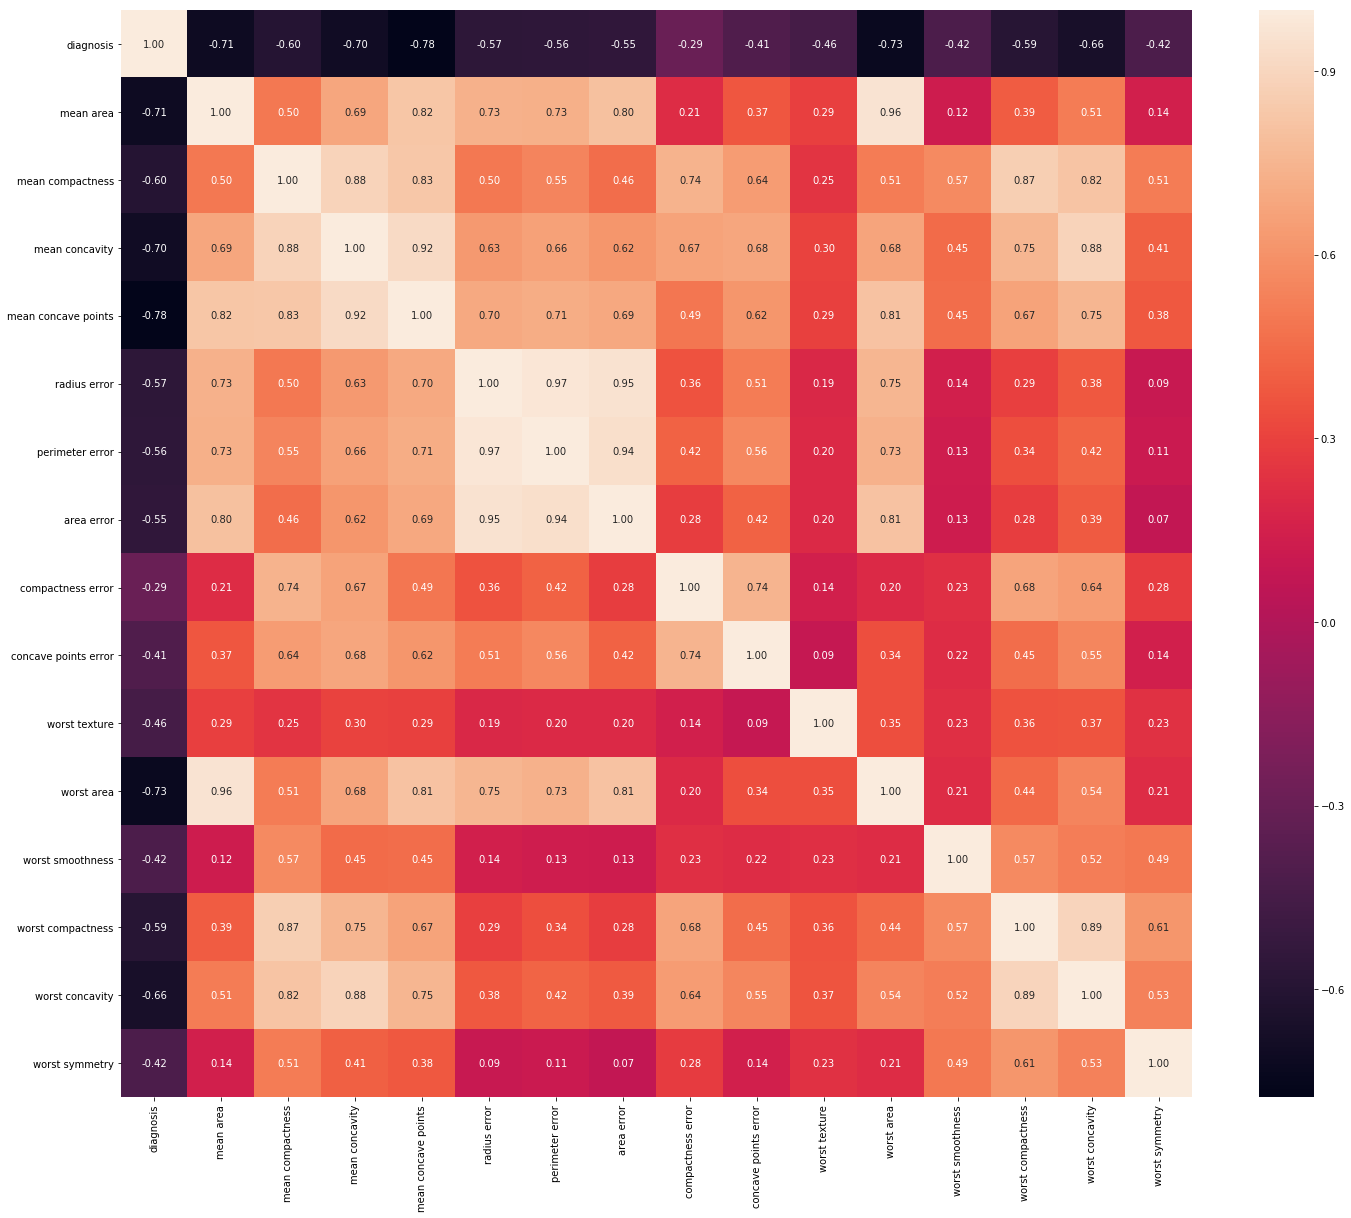

In [23]:
plt.figure(figsize=(24,20))
sns.heatmap(pd.concat([ds_breast_y, ds_breast_x],axis=1).corr(),annot=True, fmt='.2f')

In [24]:
ds_breast_x = ds_breast_x.drop("radius error",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
6,compactness error,19.160
7,concave points error,19.198
8,worst texture,22.588
5,area error,28.274
13,worst symmetry,34.771
4,perimeter error,40.834
10,worst smoothness,45.845
9,worst area,60.325
3,mean concave points,60.560
0,mean area,61.151


In [25]:
ds_breast_x = ds_breast_x.drop("mean concavity",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
5,compactness error,16.502
6,concave points error,18.491
11,worst concavity,19.773
7,worst texture,22.416
4,area error,26.770
2,mean concave points,33.734
12,worst symmetry,34.764
3,perimeter error,40.663
10,worst compactness,41.705
9,worst smoothness,43.549


In [26]:
ds_breast_x = ds_breast_x.drop("mean compactness",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
4,compactness error,14.176
5,concave points error,18.415
10,worst concavity,18.791
1,mean concave points,19.126
6,worst texture,22.072
3,area error,26.397
9,worst compactness,31.278
11,worst symmetry,34.625
8,worst smoothness,37.839
2,perimeter error,39.058


In [27]:
ds_breast_x = ds_breast_x.drop("mean area",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
3,compactness error,13.910
0,mean concave points,17.367
4,concave points error,18.403
9,worst concavity,18.708
6,worst area,21.404
5,worst texture,21.534
2,area error,26.396
8,worst compactness,29.731
10,worst symmetry,33.816
7,worst smoothness,37.836


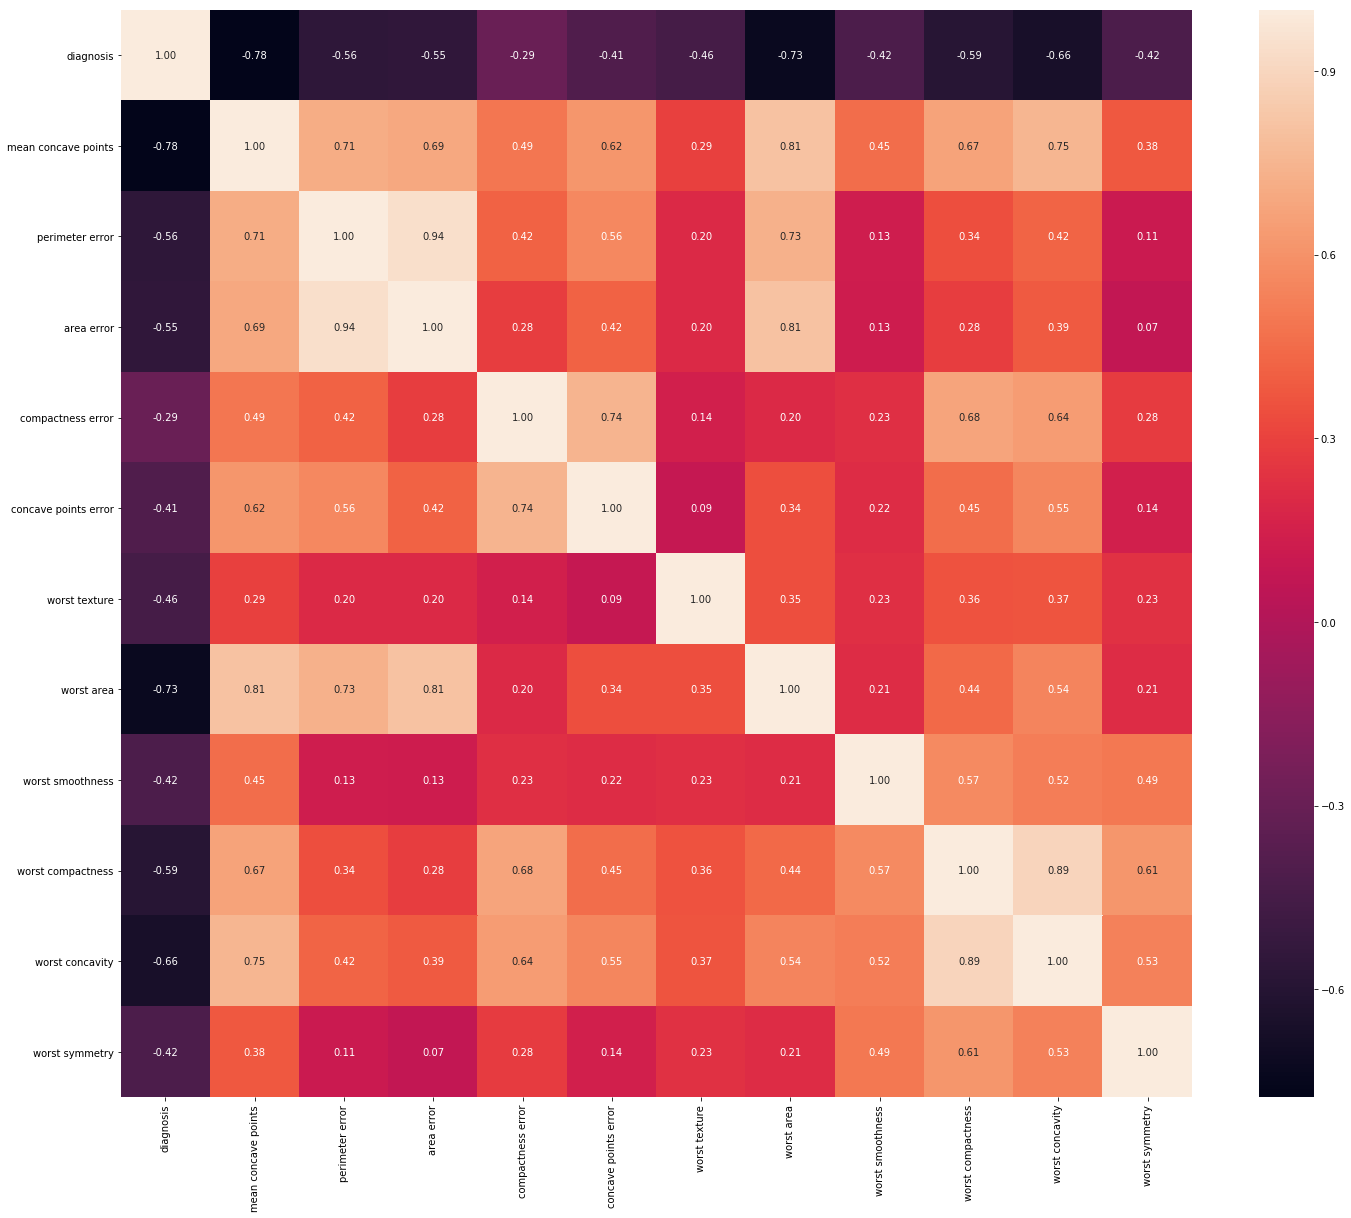

In [28]:
plt.figure(figsize=(24,20))
sns.heatmap(pd.concat([ds_breast_y, ds_breast_x],axis=1).corr(),annot=True, fmt='.2f')

In [29]:
ds_breast_x = ds_breast_x.drop("perimeter error",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
1,area error,6.627
2,compactness error,13.883
3,concave points error,16.187
0,mean concave points,16.982
8,worst concavity,17.684
5,worst area,20.535
4,worst texture,20.667
7,worst compactness,29.392
9,worst symmetry,32.917
6,worst smoothness,37.533


In [30]:
ds_breast_x = ds_breast_x.drop("worst smoothness",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
1,area error,6.621
2,compactness error,13.379
3,concave points error,15.121
0,mean concave points,16.860
4,worst texture,17.117
7,worst concavity,17.399
8,worst symmetry,19.180
5,worst area,20.300
6,worst compactness,28.786


In [31]:
ds_breast_x = ds_breast_x.drop("worst compactness",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
1,area error,6.428
6,worst concavity,9.662
2,compactness error,9.749
3,concave points error,12.225
0,mean concave points,16.009
7,worst symmetry,16.299
4,worst texture,17.099
5,worst area,20.287


In [32]:
ds_breast_x = ds_breast_x.drop("worst area",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
1,area error,3.822
2,compactness error,8.903
5,worst concavity,9.532
0,mean concave points,12.114
3,concave points error,12.146
4,worst texture,14.609
6,worst symmetry,16.194


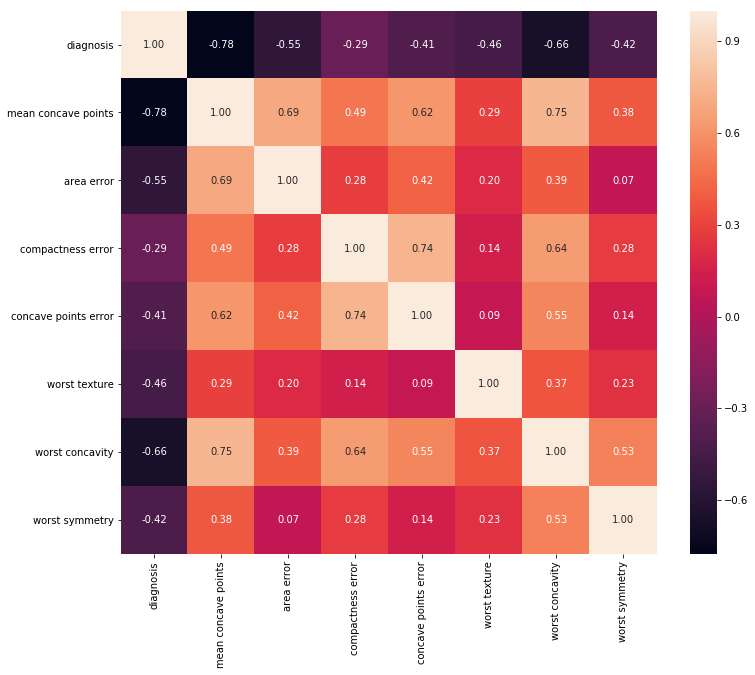

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.concat([ds_breast_y, ds_breast_x],axis=1).corr(),annot=True, fmt='.2f')

In [35]:
ds_breast_x = ds_breast_x.drop("worst symmetry",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
1,area error,3.736
4,worst texture,4.643
2,compactness error,8.891
5,worst concavity,9.410
3,concave points error,11.970
0,mean concave points,12.067


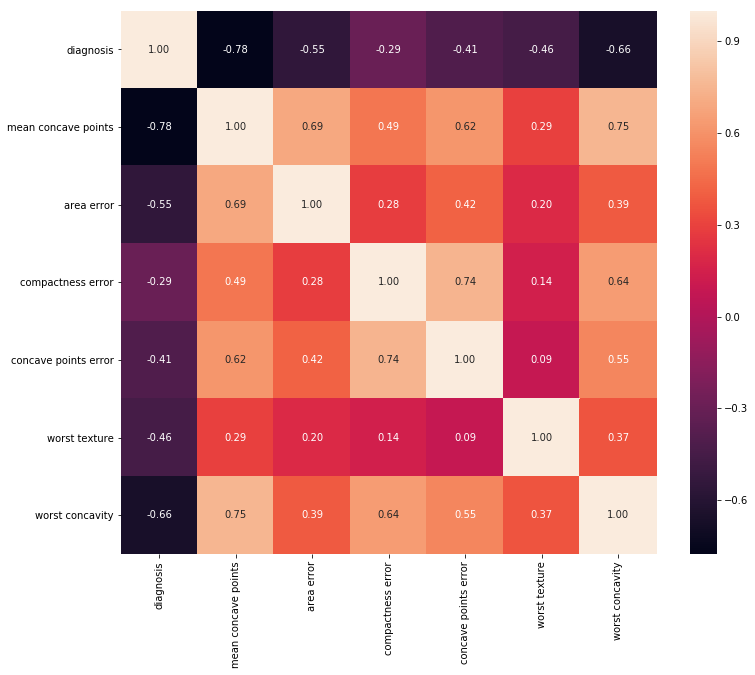

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.concat([ds_breast_y, ds_breast_x],axis=1).corr(),annot=True, fmt='.2f')

In [37]:
ds_breast_x = ds_breast_x.drop("mean concave points",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
0,area error,2.309
3,worst texture,4.615
4,worst concavity,5.300
1,compactness error,8.348
2,concave points error,10.432


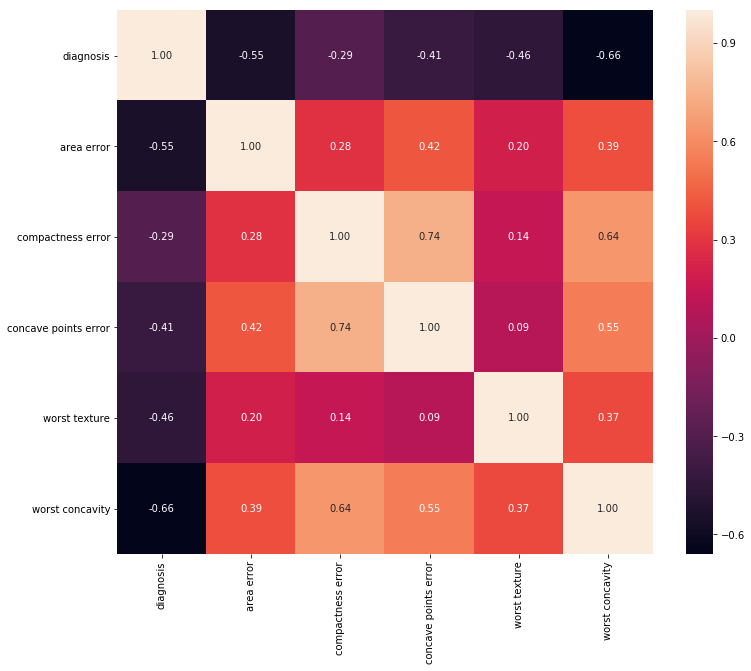

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.concat([ds_breast_y, ds_breast_x],axis=1).corr(),annot=True, fmt='.2f')

In [39]:
ds_breast_x = ds_breast_x.drop("concave points error",axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = ds_breast_x.columns
df_vif["vif"] = [variance_inflation_factor(ds_breast_x.values,i) for i in range(ds_breast_x.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)
# ds_breast_x.head()

,variable,vif
0,area error,2.115
2,worst texture,3.712
1,compactness error,4.801
3,worst concavity,5.298


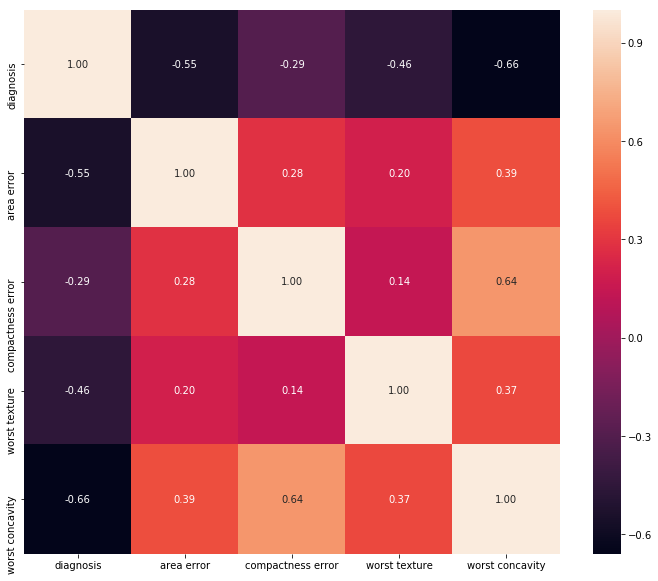

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.concat([ds_breast_y, ds_breast_x],axis=1).corr(),annot=True, fmt='.2f')